Exploring pandas, data wrangling with pandas, statistical data modelling

Part a) Data Wrangling:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1. Dataset: Download any the dataset of your choice from online and select appropiate x
and y label values.

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Advertising.csv', usecols = ['TV', 'Radio', 'Newspaper', 'Sales'])

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


2. Missing Data: Check for missing data in all the cells, print True where you find the
missing data information otherwise print False.


In [4]:
data.isna().sum() 

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
# there are no null values
data.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


3. Categorize: Create a new list/array/dataframe containing type corresponding to
sales, name this as “sales type”. If sales is >=15, set value of sales type to
“high”, if sales is <15 and >=5, set value of sales type to “medium”, else set
sales to “low”. (If you chose data of your choice, create a new category with
respect to your data and follow this in further steps as well.)


In [6]:
sales_type = pd.DataFrame(columns = ['Sales Type'])

In [7]:
def convert(x):
    if(x>=15):
        return "High"
    elif(x<15 and x>=5):
        return "Medium"
    else:
        return "Low"

In [8]:
sales_type['Sales Type'] = data['Sales'].apply(convert)

In [9]:
sales_type.head()

,Sales Type
0,High
1,Medium
2,Medium
3,High
4,Medium


4. Concatenation: Concatenate the “sales type” column to the original downloaded
dataset.

In [10]:
data = pd.concat([data, sales_type], axis = 1)
data.head()

,TV,Radio,Newspaper,Sales,Sales Type
0,230.1,37.8,69.2,22.1,High
1,44.5,39.3,45.1,10.4,Medium
2,17.2,45.9,69.3,9.3,Medium
3,151.5,41.3,58.5,18.5,High
4,180.8,10.8,58.4,12.9,Medium


5. Groupby and Aggregation: Aggregate for each column, grouped by “sales type
column”, perform sum and average on “TV”, “newspaper” and “radio”.

In [13]:
df = data.groupby(by = ['Sales Type'])

In [15]:
df['TV'].sum()

Sales Type
High      16469.8
Low          13.4
Medium    12925.3
Name: TV, dtype: float64

In [16]:
df['TV'].mean()

Sales Type
High      213.893506
Low         4.466667
Medium    107.710833
Name: TV, dtype: float64

In [18]:
df['Newspaper'].sum()

Sales Type
High      2720.6
Low         15.4
Medium    3374.8
Name: Newspaper, dtype: float64

In [19]:
df['Newspaper'].mean()

Sales Type
High      35.332468
Low        5.133333
Medium    28.123333
Name: Newspaper, dtype: float64

In [20]:
df['Radio'].sum()

Sales Type
High      2594.1
Low         53.3
Medium    2005.4
Name: Radio, dtype: float64

In [23]:
df['Radio'].mean()

Sales Type
High      33.689610
Low       17.766667
Medium    16.711667
Name: Radio, dtype: float64

6. Reshaping and Pivoting: Explore these two on pandas and do 1-2 sample examples.

In [27]:
# pivot function is used to create a new derived table out of the given one

piv = data.pivot_table(index = 'Sales Type', values = 'TV', aggfunc = np.mean)
piv.head()

,TV
Sales Type,
High,213.893506
Low,4.466667
Medium,107.710833


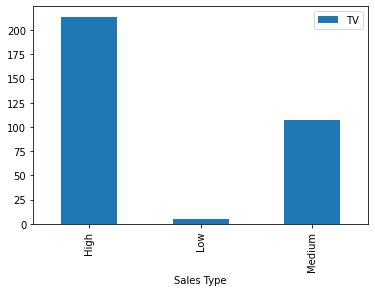

In [29]:
# let's plot a bar graph
piv.plot(kind = 'bar')

In [31]:
# reshaping
df_melt = data.melt(id_vars = ['Sales Type'])
print(df_melt.shape)
df_melt.head()

(800, 3)


,Sales Type,variable,value
0,High,TV,230.1
1,Medium,TV,44.5
2,Medium,TV,17.2
3,High,TV,151.5
4,Medium,TV,180.8


In [33]:
df_stack = data.stack()
print(df_stack.shape)
df_stack.head()

(1000,)


0  TV            230.1
   Radio          37.8
   Newspaper      69.2
   Sales          22.1
   Sales Type     High
dtype: object

In [34]:
df_unstack = df_stack.unstack()
print(df_stack.shape)
df_unstack.head()

(1000,)


,TV,Radio,Newspaper,Sales,Sales Type
0,230.1,37.8,69.2,22.1,High
1,44.5,39.3,45.1,10.4,Medium
2,17.2,45.9,69.3,9.3,Medium
3,151.5,41.3,58.5,18.5,High
4,180.8,10.8,58.4,12.9,Medium


7. Dataset: Use the original downloaded dataset and perform the following: Select every
6
th row of column “TV” and set it to NaN/NULL and select every 10th row of column
“Newspaper” and set it to NaN/NULL. Print only rows containing no Nan/NULL
value.

In [39]:
data.loc[::6, ['TV']] = np.nan
data.loc[::10, ['Newspaper']] = np.nan

In [40]:
data.head(12)

,TV,Radio,Newspaper,Sales,Sales Type
0,NaN,37.8,NaN,22.1,High
1,44.5,39.3,45.1,10.4,Medium
2,17.2,45.9,69.3,9.3,Medium
3,151.5,41.3,58.5,18.5,High
4,180.8,10.8,58.4,12.9,Medium
5,8.7,48.9,75.0,7.2,Medium
6,NaN,32.8,23.5,11.8,Medium
7,120.2,19.6,11.6,13.2,Medium
8,8.6,2.1,1.0,4.8,Low
9,199.8,2.6,21.2,10.6,Medium


In [45]:
#skipping rows containing null values
condition = data.isna().any(axis = 1)
data[~condition]

,TV,Radio,Newspaper,Sales,Sales Type
1,44.5,39.3,45.1,10.4,Medium
2,17.2,45.9,69.3,9.3,Medium
3,151.5,41.3,58.5,18.5,High
4,180.8,10.8,58.4,12.9,Medium
5,8.7,48.9,75.0,7.2,Medium
...,...,...,...,...,...
194,149.7,35.6,6.0,17.3,High
195,38.2,3.7,13.8,7.6,Medium
196,94.2,4.9,8.1,9.7,Medium
197,177.0,9.3,6.4,12.8,Medium


8. Fill in missing values: There are a variety of methods which can be used to fill in the
missing values (Recently Created). Explore them
a. Fill missing(NaN/NULL) values with 0
b. Fill missing(NaN/NULL) values with average of column

In [47]:
data.head(10)

,TV,Radio,Newspaper,Sales,Sales Type
0,NaN,37.8,NaN,22.1,High
1,44.5,39.3,45.1,10.4,Medium
2,17.2,45.9,69.3,9.3,Medium
3,151.5,41.3,58.5,18.5,High
4,180.8,10.8,58.4,12.9,Medium
5,8.7,48.9,75.0,7.2,Medium
6,NaN,32.8,23.5,11.8,Medium
7,120.2,19.6,11.6,13.2,Medium
8,8.6,2.1,1.0,4.8,Low
9,199.8,2.6,21.2,10.6,Medium


In [53]:
data['TV'].fillna(data['TV'].mean(), inplace = True)

In [55]:
data['Newspaper'].fillna(0, inplace = True)

In [56]:
data.head(10)

,TV,Radio,Newspaper,Sales,Sales Type
0,148.757831,37.8,0.0,22.1,High
1,44.500000,39.3,45.1,10.4,Medium
2,17.200000,45.9,69.3,9.3,Medium
3,151.500000,41.3,58.5,18.5,High
4,180.800000,10.8,58.4,12.9,Medium
5,8.700000,48.9,75.0,7.2,Medium
6,148.757831,32.8,23.5,11.8,Medium
7,120.200000,19.6,11.6,13.2,Medium
8,8.600000,2.1,1.0,4.8,Low
9,199.800000,2.6,21.2,10.6,Medium


In [57]:
# we can now observe that there are no null values.
data.isna().sum()

TV            0
Radio         0
Newspaper     0
Sales         0
Sales Type    0
dtype: int64

9. Normalization: Each column can be normalized into 0 to 1 using different methods such
as scaling, standardizing etc. This part you have to explore. Note: Normalization should
not be done for the target feature(which is sales here).